<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_p_319~341.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 6. 규제 선형모델-릿지, 라쏘, 엘라스틱넷
**규제 선형모델의 개요**
* 선형모델 비용함수는 RSS최소화에만 초점, but 학습 데이터에 지나치게 맞추게되고 회귀계수 커짐
* 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용함수의 목표가 다음과 같아야함.
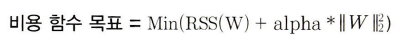

* alpha값을 크게하면 비용함수는 회귀계수 W를 적게해 과적합을 개선할 수 있다. 
-> 이처럼 과적합을 개선하는 방식 : 규제
>> L2규제 : W제곱에 페널티부여-릿지
>> L1규제 : W절댓값에 대해 패널티부여-랏쏘, 영향력이 크지않은 회귀계수값을 0으로 변환
**릿지회귀**
* Ridge 클래스의 주요 생성 파라미터는 alpha-L2규제 계수
* 예측성능은 cross_vla_score로 평

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston  지원불가
%matplotlib inline

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정하고 릿지회귀 수행
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,3))
print('5 folds의 평균 RMSE scores:{0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores: [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE scores:5.518


5개 폴드세트의 평균 RMSE가 5.518이다. 규제가 없는 LinearRegression의 RMSE평균보다 뛰어난 예측성능을 보여줌


In [6]:
#릿지의 alpha값을 변화시키면서 RMSE와 회귀계수값의 변화 살펴보기

#릿지에 사용될 alpha 파라미터값 정의
alphas=[0,0.1,1,10,100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
  ridge=Ridge(alpha=alpha)

  #cross_val_score를 이용해 5폴드의 평균 RMSE를 계산
  neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring="neg_mean_squared_error",cv=5)
  avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha{0}일때 5folds의 평균 RMSE:{1:.3f}'.format(alpha,avg_rmse))
  

alpha0일때 5folds의 평균 RMSE:5.829
alpha0.1일때 5folds의 평균 RMSE:5.788
alpha1일때 5folds의 평균 RMSE:5.653
alpha10일때 5folds의 평균 RMSE:5.518
alpha100일때 5folds의 평균 RMSE:5.330


alpha가 100일때 가장 좋다.

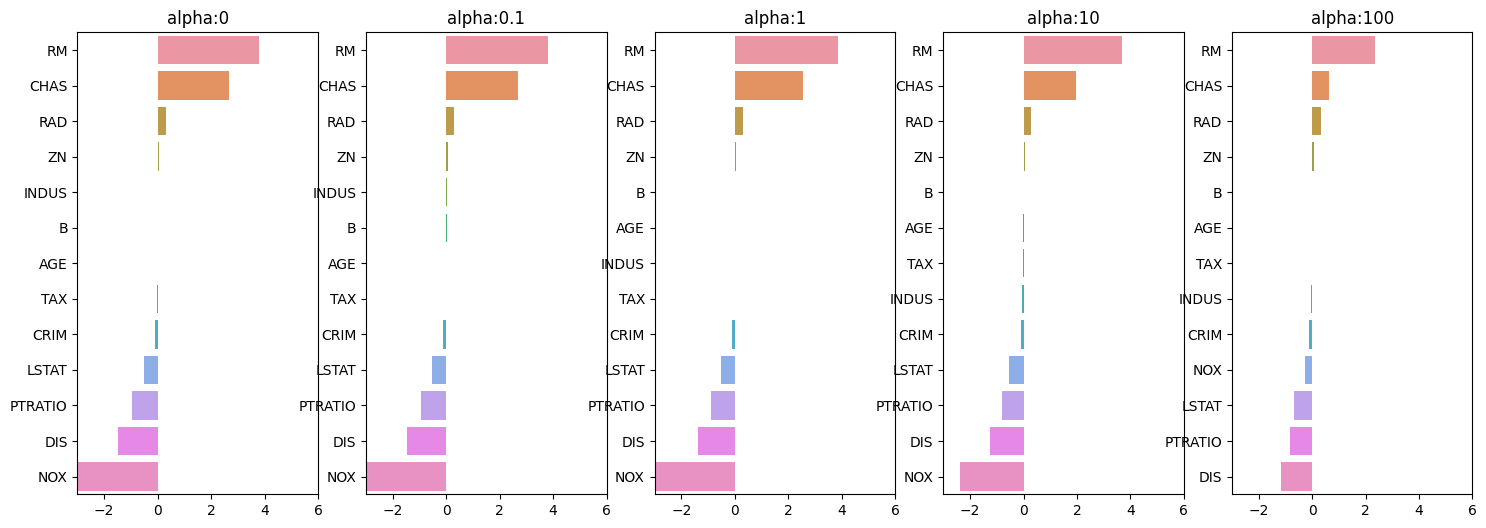

In [7]:
#alpha값의 변화에 따른 피처의 회귀계수값을 시각화해보기

#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs=plt.subplots(figsize=(18,6), nrows=1, ncols=5)
#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DF 생성
coeff_df=pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치를 지정해줌.
for pos, alpha in enumerate(alphas):
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_data, y_target)
  #alpha에 따른 피처별로 회귀 계수를 series로 변환하고 이를 DF에 칼럼으로 추가
  coeff=pd.Series(data=ridge.coef_, index=X_data.columns)
  colname='alpha:'+str(alpha)
  coeff_df[colname]=coeff
  #막대 그래프로 각 알파 값에서의 회귀 계수 시각화, 회귀 계수값이 높은 순으로 표현
  coeff=coeff.sort_values(ascending=False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3, 6)
  sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

#for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 Df로 표시
plt.show()

alpha값을 증가시킬수록 회귀계수값은 작아진다. NOX피처의 경우 크게 작아지고 있다. 

In [8]:
#DataFrame에 저장된 alpha값에 따른 릿지회귀계수구하기
ridge_alphas=[0, 0.1, 1, 10, 100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha값이 증가하면서 회귀계수는 작아지나 회귀계수를 0으로 만들지는 않는다.



**라쏘회귀**
* W의 절댓값에 패널티를 부여하는 L1규제를 선형회귀에 적용한것이 라쏘 회귀이다. 불필요한 회귀계수를 감소시켜 0으로 만들고 제거

In [9]:
from sklearn.linear_model import Lasso, ElasticNet

#alpha 값에 따른 회귀 모델의 폴드 평균  RMSE 출력하고 회귀 계수값들을 DF으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
  coeff_df=pd.DataFrame()
  if verbose : print('#####', model_name, '#####')
  for param in params:
    if model_name=='Ridge':model=Ridge(alpha=param)
    elif model_name=='ElasticNet':model=ElasticNet(alpha=param, l1_ratio=0.7)
    elif model_name=='Lasso':model=Lasso(alpha=param)
    neg_mse_scores=cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 폴드 세트의 평균 rmse: {1:.3f}'.format(param, avg_rmse))
    #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
    model.fit(X_data, y_target)
    #alpha에 따른 피처별 회귀 계수를 series로 변환하고 이를 DF의 칼럼으로 추가
    coeff=pd.Series(data=model.coef_, index=X_data.columns)
    colname='alpha:'+str(param)
    coeff_df[colname]=coeff
  return coeff_df

#end of get_linear_regre_eval

이를 활용해 RMSE와 회귀계수들을 출력해본다. get_linear_reg_eval()에 모델명을 Lasso로 입력하면 라쏘모델기반으로 수행

In [10]:
#라쏘에 사용될 alpha 파라미터 값 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas=[0.07, 0.1, 0.5, 1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

##### Lasso #####
alpha 0.07일 때 5 폴드 세트의 평균 rmse: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 rmse: 5.669
alpha 1일 때 5 폴드 세트의 평균 rmse: 5.776
alpha 3일 때 5 폴드 세트의 평균 rmse: 6.189


alpha가 0.07일때 가장 좋은 평균 RMSE를 보여준다.

In [11]:
#피처에 따른 회귀계수 확인
#반환된 coeff_lasso_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 Df출력
sort_column='alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha크기가 증가할수록 일부 피처 회귀계수는 0으로 바뀐다.


**엘라스틱넷 회귀**
* L1규제와 L2규제를 결합한 회귀
* 수행시간 오래걸리는 단점
* ElasticNet클래스를 통해 엘레스틱넷 회귀를 구현
* 주요생성파라미터는 alpha와 l1_ratio 
* 규제: a*L1+b*L2로 정의- alpha파라미터값은 a+b

In [12]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7 고정
elastic_alphas=[0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

##### ElasticNet #####
alpha 0.07일 때 5 폴드 세트의 평균 rmse: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 rmse: 5.467
alpha 1일 때 5 폴드 세트의 평균 rmse: 5.597
alpha 3일 때 5 폴드 세트의 평균 rmse: 6.068


In [13]:
#반환된 coeff_elastic_df를 첫번째 칼럼순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha 0.5일때 RMSE가 5.467로 가장 좋은 예측성능
* 선형회귀의 경우 최적의 하이퍼 파라미터를 찾아내는것과 더불어 데이터분포도의 정규화와 인코딩이 중요

**선형회귀모델을 위한 데이터 변환**
* 피처와 타깃값간 선형관계가 있다고 가정하고 최적의 선형함수를 찾아내 결과값을 예측
* 타깃값의 경우 왜곡 분포도를 띄면 예측성능에 안좋으니 정규화가 중요하다. 
> 1. standardscaler 클래스를 이용해 평균이0, 분산이1인 정규분포를 가진 데이터 세트로 변환하거나 MinMaxScaler클래스를 통해 최솟값이 0이고 최댓값이 1인 정규화 수행
> 2. 스케일링/정규화를 수행한 데이터세트에 다항특성을 적용하여 변환하는 방법이다. 
> 3. 원래값에 로그취해서 로그변환시키기. 1번은 예측성능 향상을 기대하기 힘들고 2번은 피처의 개수가 많을경우 과적합 이슈가능해서 로그변환이 일반적


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
     
#method는 표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그변환 결정
#p_degree는 다항식 특성을 추가할 때 적용. 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
  if method=='Standard':
    scaled_data=StandardScaler().fit_transform(input_data)
  elif method=='MinMax':
    scaled_data=MinMaxScaler().fit_transform(input_data)
  elif method=='Log':
    scaled_data=np.log1p(input_data)
  else:
    scaled_data=input_data

  if p_degree !=None:
    scaled_data=PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
  return scaled_data

 Ridge클래스의 alpha를 변화시키면서 피처데이터세트를 여러 방법으로 변환한 데이터세트를 입력받을때 RMSE가 어떻게 변하는지 살펴본다.

In [15]:
#Ridge의 알파 값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas=[0.1, 1, 10, 100]

#5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
#최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
  X_data_scaled=get_scaled_data(method=scale_method[0], p_degree=scale_method[1], input_data=X_data)
  print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
  get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 5.788
alpha 1일 때 5 폴드 세트의 평균 rmse: 5.653
alpha 10일 때 5 폴드 세트의 평균 rmse: 5.518
alpha 100일 때 5 폴드 세트의 평균 rmse: 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 5.826
alpha 1일 때 5 폴드 세트의 평균 rmse: 5.803
alpha 10일 때 5 폴드 세트의 평균 rmse: 5.637
alpha 100일 때 5 폴드 세트의 평균 rmse: 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 8.827
alpha 1일 때 5 폴드 세트의 평균 rmse: 6.871
alpha 10일 때 5 폴드 세트의 평균 rmse: 5.485
alpha 100일 때 5 폴드 세트의 평균 rmse: 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 5.764
alpha 1일 때 5 폴드 세트의 평균 rmse: 5.465
alpha 10일 때 5 폴드 세트의 평균 rmse: 5.754
alpha 100일 때 5 폴드 세트의 평균 rmse: 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 5.298
alpha 1일 때 5 폴드 세트의 평균 rmse: 4.323
alpha 10일 때 5 폴드 세트의 평균 rmse: 5.185
alpha 100일 때 5 폴드 세트의 평균 rmse: 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 rmse: 4.770

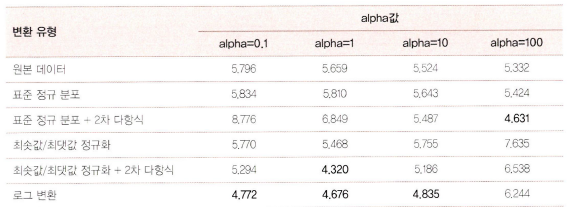

정규분포와 최솟/최댓값 정규화로 데이터세트 변경해도 성능개선 없음
### 7.로지스틱 회귀
* 선형회귀방식을 분류에 적용한 알고리즘
* 선형, 비선형 여부는 가중치 변수에 따라 다름
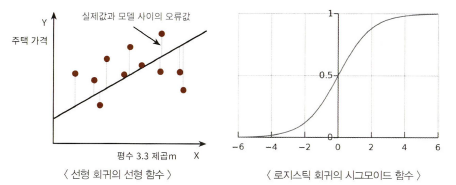

* 시그모이드함수 최적선을 찾고 이 함수의 반환값을 확률로 간주해 확률에따라 분류 결정
* 시그모이드함수는 x값이 작아지거나 커져도 y값은 0과 1사이 값을 반환한다. 


In [16]:
#위스콘신 유방암 데이터세트를 이용해 로지스틱회귀로 암여부 판단 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

In [17]:
# 정규분포 형태 표준 스케일링 후 데이터 세트 분리
from sklearn.model_selection import train_test_split

#StandardScaler()로 평균 0, 분산 1로 데이터 분포 변환
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test=train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds=lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {0:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


로지스틱회귀의 주요 하이퍼파라미터는 penalty와 C-alpha의 역수 :C가 작을수록 규제강도 큼 

In [21]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['12', 'l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}

grid_clf=GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
#grid_clf.fit(data_scaled, cancer.target)
#print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

###회귀트리
* 비선형 회귀는 회귀계수의 결합이 비선형
* 트리기반 회귀는 회귀트리를 이용하는 것.
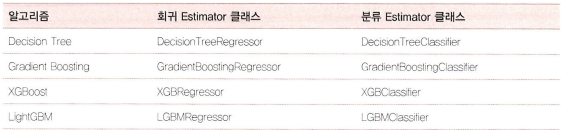

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# from sklearn.datasets import load_boston  지원불가
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

feature_names=['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX'	,'PTRATIO',	'B'	,'LSTAT',	'PRICE']
bostonDF = pd.DataFrame(boston, columns=feature_names)
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()


y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf=RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores=cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 교차 검증의 개별 negative mse scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 rmse scores:', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 rmse: {0:.3f}'.format(avg_rmse))

Boston 데이터 세트 크기: (506, 14)
5 교차 검증의 개별 negative mse scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 rmse scores: [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 rmse: 4.423


get_model_cv_prediction()은 입력모델과 데이터세트를 입력받아 교차검증으로 평균 RMSE를 계산하는 함수

In [27]:
def get_model_cv_predcition(model, X_data, y_target):
  neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print('#####', model.__class__.__name__, '#####')
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg=RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

#트리 기반의 회귀 모델 반복하며 평가 수행
models=[dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_predcition(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.251
##### LGBMRegressor #####
5 교차 검증의 평균 RMSE : 4.646


회귀트리 Regressor클래스는 회귀계수를 제공하는 coef_ 속성이 없다.

<Axes: >

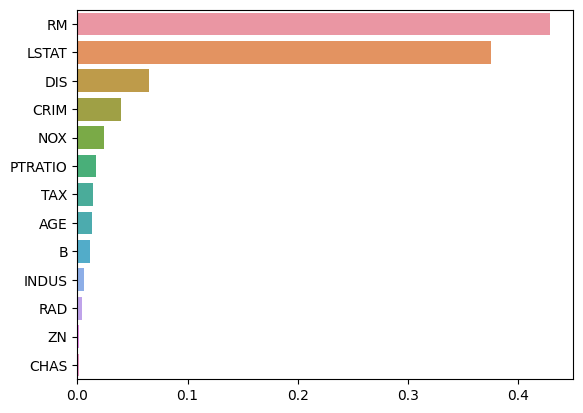

In [29]:
import seaborn as sns 
%matplotlib inline

rf_reg=RandomForestRegressor(n_estimators=1000)

#앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

Regressor가 어떻게 예측값을 판단하는지 선형회귀와 비교해 시각화 해본다. max_depth크기를 변화시키면서 예측선이 변화하는지 살펴본다.

(100, 2)


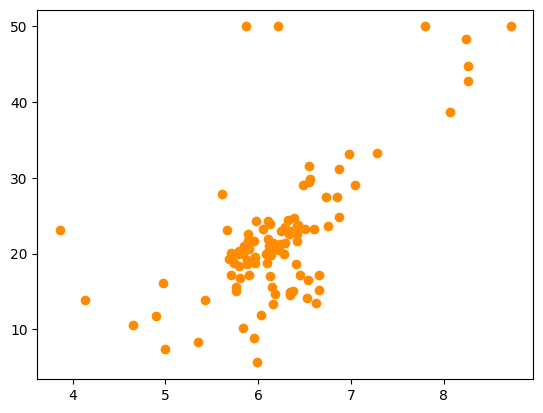

In [30]:
bostonDF_sample=bostonDF[['RM', 'PRICE']]
bostonDF_sample=bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression

#선형 회귀와 결정 트리 기반의 regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2,7
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test=np.arange(4.5, 8.5, 0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 price 추출
X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

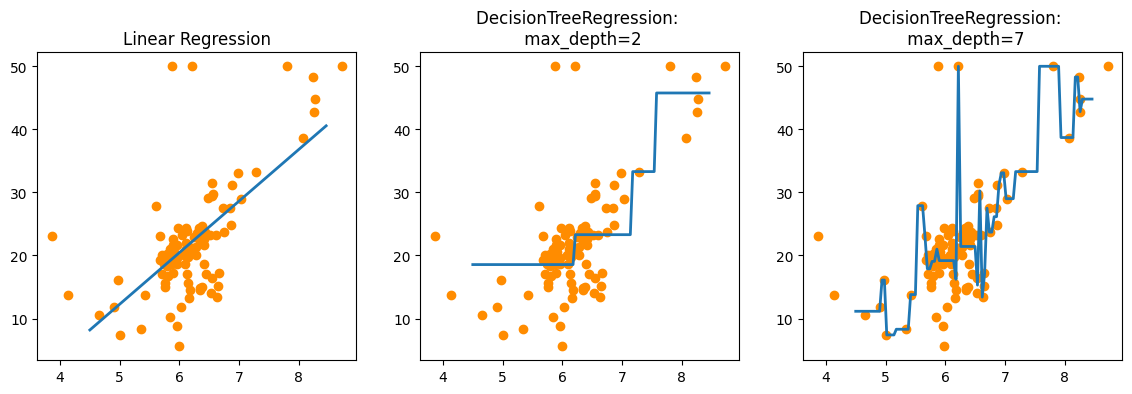

In [32]:
# 2,7로 학습된 Regressor에서 예측한 Price 회귀선 그리기
fig, (ax1, ax2, ax3)=plt.subplots(figsize=(14,4), ncols=3)

#X축 값을 4.5~8.5로 변환하여 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

#DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('DecisionTreeRegression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

#DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('DecisionTreeRegression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)

회귀트리는 브랜치를 만들며 계단형태의 회귀선을 만든다. max_depth=7인 경우는 이상치 데이터도 학습하면서 복잡한 회귀선을 만들어 과적합되기 쉬운모델이 되었다.